In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df=pd.read_csv(r"V:\Downloads\task_8.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
print('Gender',df['gender'].unique(),'\n','SeniorCitizen',df['SeniorCitizen'].unique(),'\n','Partner',df['Partner'].unique(),'\n','Dependents',df['Dependents'].unique(),'\n','PhoneService',df['PhoneService'].unique(),'\n','MultipleLines',df['MultipleLines'].unique(),'\n','InternetService',df['InternetService'].unique(),'\n','OnlineSecurity',df['OnlineSecurity'].unique(),'\n','OnlineBackup',df['OnlineBackup'].unique(),'\n','DeviceProtection',df['DeviceProtection'].unique(),'\n','TechSupport',df['TechSupport'].unique(),'\n','StreamingTV',df['StreamingTV'].unique(),'\n','StreamingMovies',df['StreamingMovies'].unique(),'\n','Contract',df['Contract'].unique(),'\n','PaperlessBilling',df['PaperlessBilling'].unique(),'\n','PaymentMethod',df['PaymentMethod'].unique(),'\n','Churn',df['Churn'].unique())

Gender ['Female' 'Male' '1' '0'] 
 SeniorCitizen [0 1] 
 Partner ['Yes' 'No' '0' '1'] 
 Dependents ['No' 'Yes'] 
 PhoneService ['No' 'Yes'] 
 MultipleLines ['No phone service' 'No' 'Yes'] 
 InternetService ['DSL' 'Fiber optic' 'No'] 
 OnlineSecurity ['No' 'Yes' 'No internet service'] 
 OnlineBackup ['Yes' 'No' 'No internet service'] 
 DeviceProtection ['No' 'Yes' 'No internet service'] 
 TechSupport ['No' 'Yes' 'No internet service'] 
 StreamingTV ['No' 'Yes' 'No internet service'] 
 StreamingMovies ['No' 'Yes' 'No internet service'] 
 Contract ['Month-to-month' 'One year' 'Two year'] 
 PaperlessBilling ['Yes' 'No'] 
 PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
 Churn ['No' 'Yes']


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
df=df[~df['gender'].isin(['1','0'])]

In [30]:
df.drop(['customerID'],axis=1,inplace=True)

In [31]:
df.dropna(inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7027 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   object 
 1   SeniorCitizen     7027 non-null   int64  
 2   Partner           7027 non-null   object 
 3   Dependents        7027 non-null   object 
 4   tenure            7027 non-null   int64  
 5   PhoneService      7027 non-null   object 
 6   MultipleLines     7027 non-null   object 
 7   InternetService   7027 non-null   object 
 8   OnlineSecurity    7027 non-null   object 
 9   OnlineBackup      7027 non-null   object 
 10  DeviceProtection  7027 non-null   object 
 11  TechSupport       7027 non-null   object 
 12  StreamingTV       7027 non-null   object 
 13  StreamingMovies   7027 non-null   object 
 14  Contract          7027 non-null   object 
 15  PaperlessBilling  7027 non-null   object 
 16  PaymentMethod     7027 non-null   object 
 17  

<Axes: xlabel='Churn', ylabel='count'>

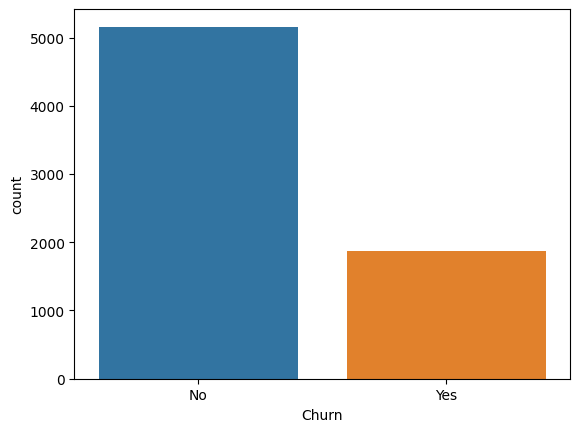

In [34]:
sns.countplot(x='Churn',data=df)

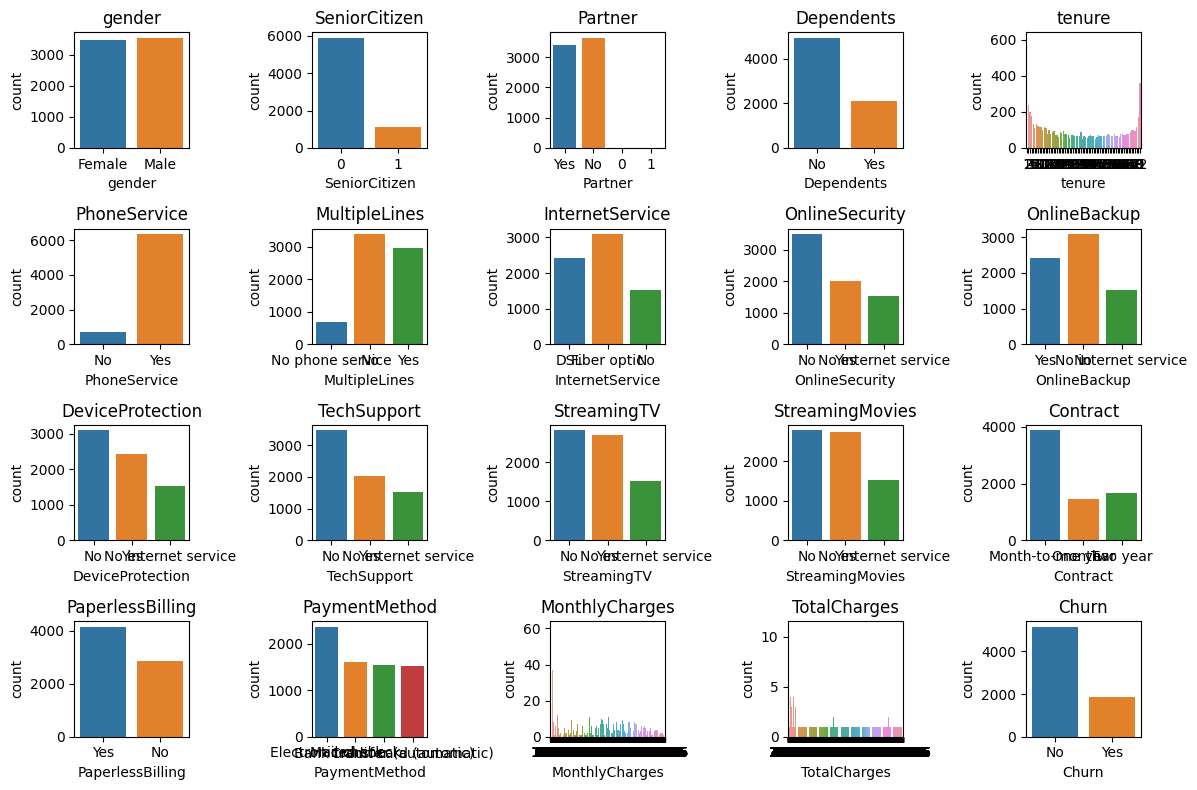

In [35]:
num_cols = len(df.columns)
num_rows = int(num_cols ** 0.5)
num_cols_subplot = int(num_cols / num_rows)
if num_cols_subplot * num_rows < num_cols:
    num_cols_subplot += 1
fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(12, 8))
axes = axes.ravel()
for i, column in enumerate(df.columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

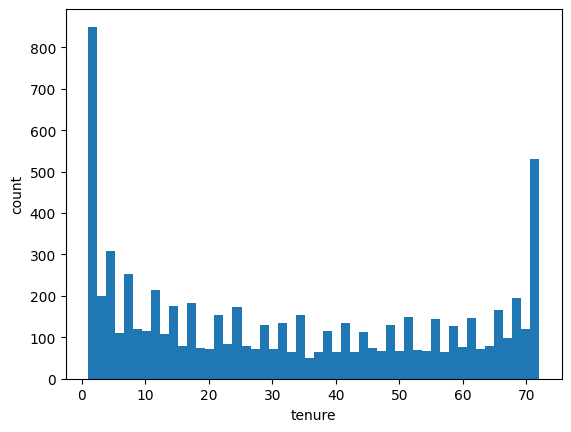

In [36]:
plt.hist(df['tenure'],bins=50)
plt.xlabel('tenure')
plt.ylabel('count')
plt.show()

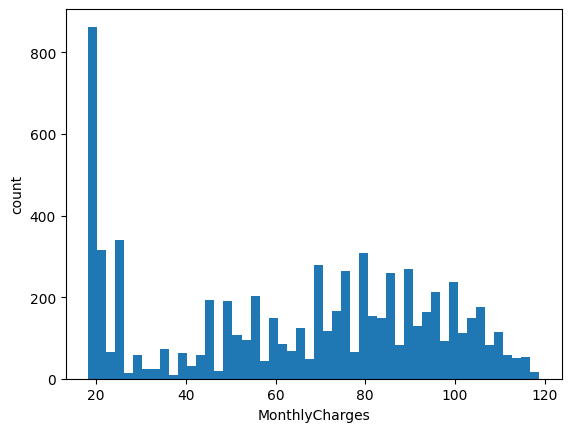

In [37]:
plt.hist(df['MonthlyCharges'],bins=50)
plt.xlabel('MonthlyCharges')
plt.ylabel('count')
plt.show()

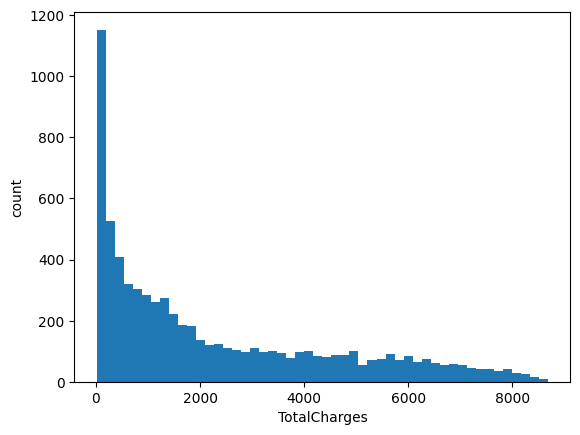

In [38]:
plt.hist(df['TotalCharges'],bins=50)
plt.xlabel('TotalCharges')
plt.ylabel('count')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

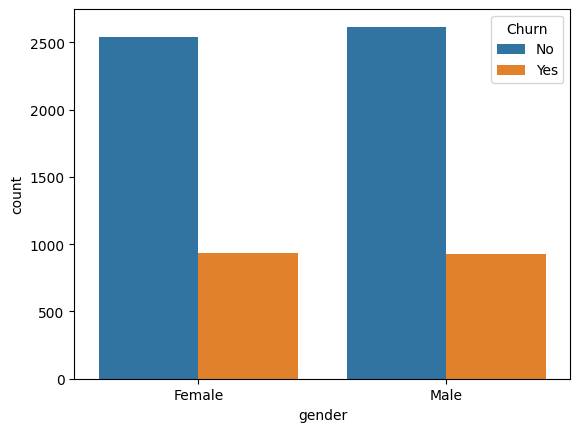

In [43]:
sns.countplot(x='gender',hue='Churn',data=df)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

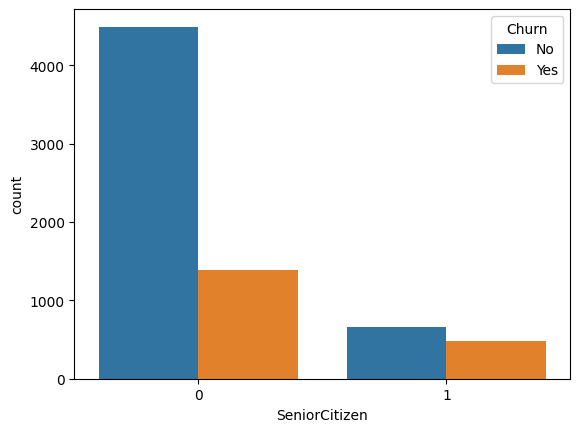

In [44]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

<Axes: xlabel='Partner', ylabel='count'>

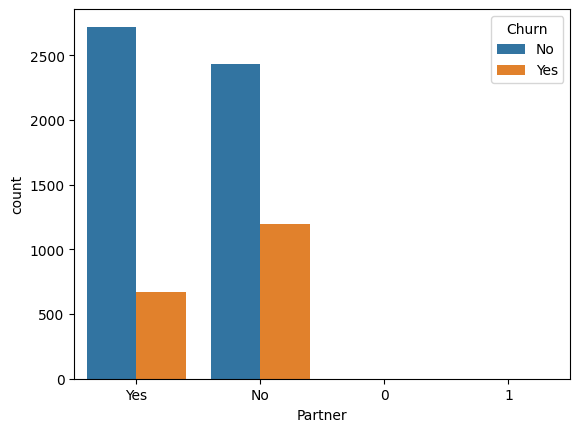

In [45]:
sns.countplot(x='Partner',hue='Churn',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

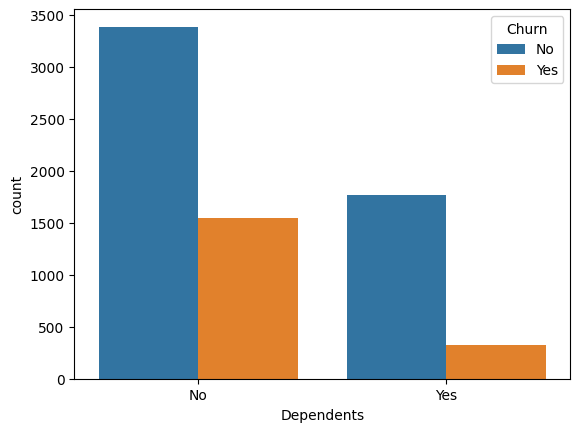

In [46]:
sns.countplot(x='Dependents',hue='Churn',data=df)

<Axes: xlabel='PhoneService', ylabel='count'>

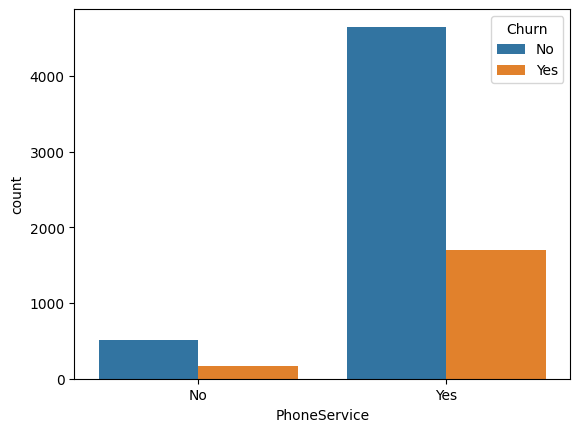

In [47]:
sns.countplot(x='PhoneService',hue='Churn',data=df)

<Axes: xlabel='MultipleLines', ylabel='count'>

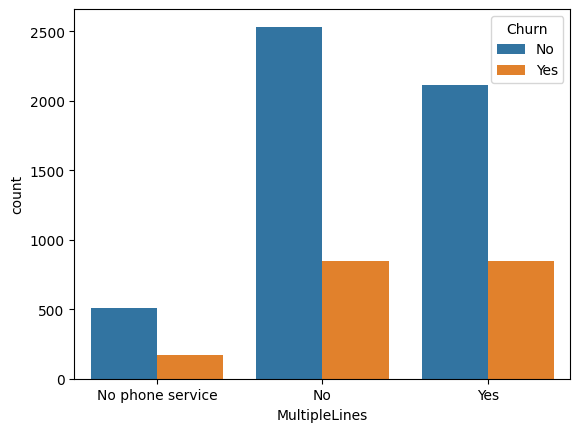

In [48]:
sns.countplot(x='MultipleLines',hue='Churn',data=df)

<Axes: xlabel='InternetService', ylabel='count'>

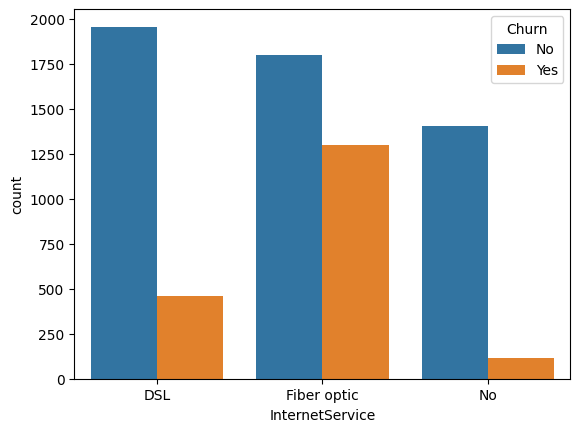

In [49]:
sns.countplot(x='InternetService',hue='Churn',data=df)

<Axes: xlabel='OnlineSecurity', ylabel='count'>

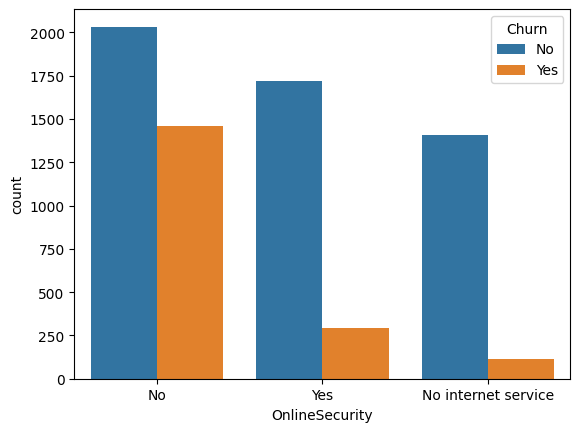

In [50]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=df)

<Axes: xlabel='OnlineBackup', ylabel='count'>

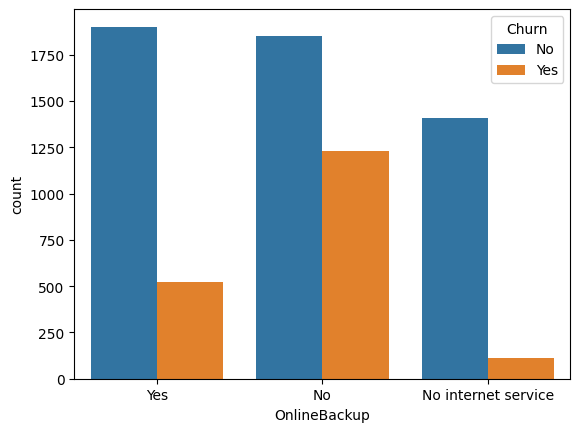

In [51]:
sns.countplot(x='OnlineBackup',hue='Churn',data=df)

<Axes: xlabel='DeviceProtection', ylabel='count'>

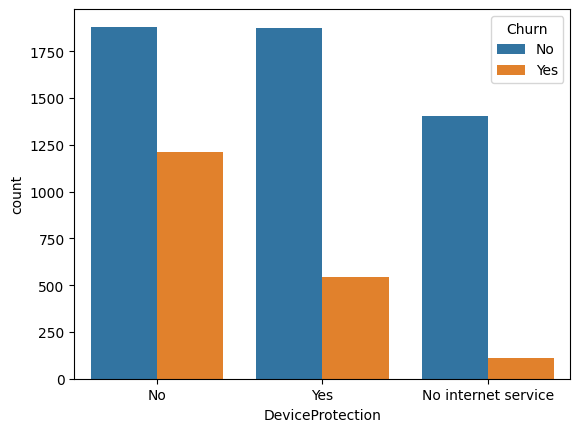

In [52]:
sns.countplot(x='DeviceProtection',hue='Churn',data=df)

<Axes: xlabel='TechSupport', ylabel='count'>

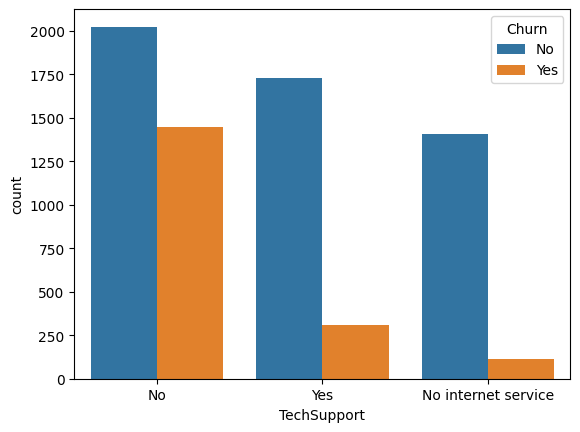

In [53]:
sns.countplot(x='TechSupport',hue='Churn',data=df)

<Axes: xlabel='StreamingTV', ylabel='count'>

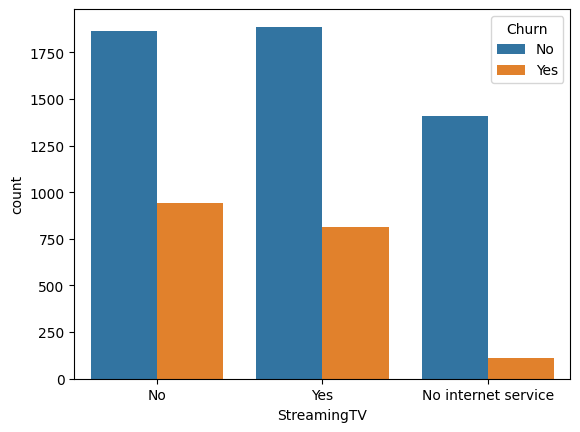

In [54]:
sns.countplot(x='StreamingTV',hue='Churn',data=df)

<Axes: xlabel='StreamingMovies', ylabel='count'>

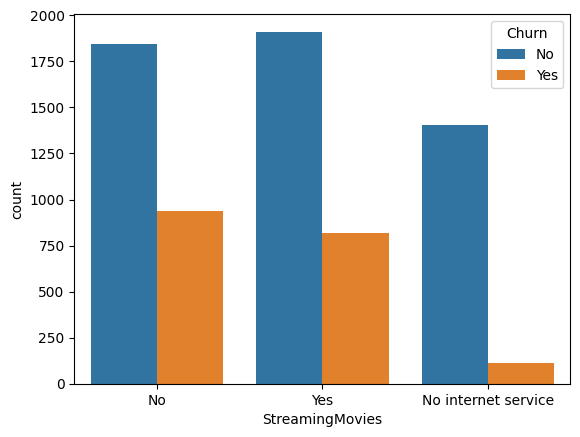

In [56]:
sns.countplot(x='StreamingMovies',hue='Churn',data=df)

<Axes: xlabel='Contract', ylabel='count'>

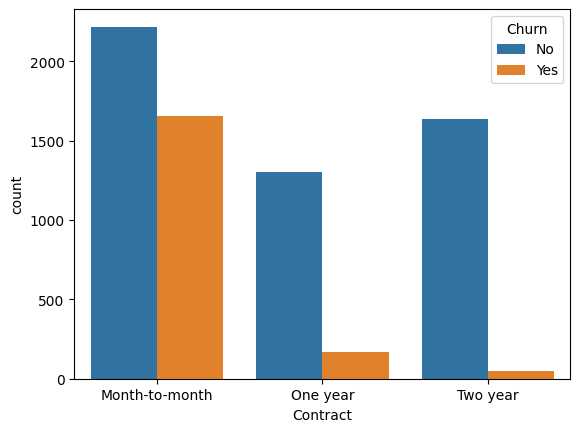

In [57]:
sns.countplot(x='Contract',hue='Churn',data=df)

<Axes: xlabel='PaperlessBilling', ylabel='count'>

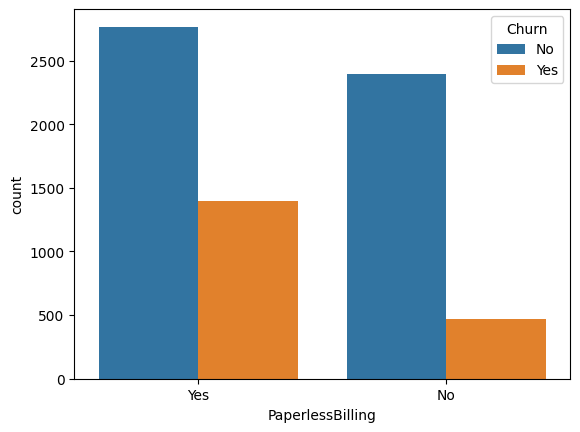

In [58]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=df)

<Axes: xlabel='PaymentMethod', ylabel='count'>

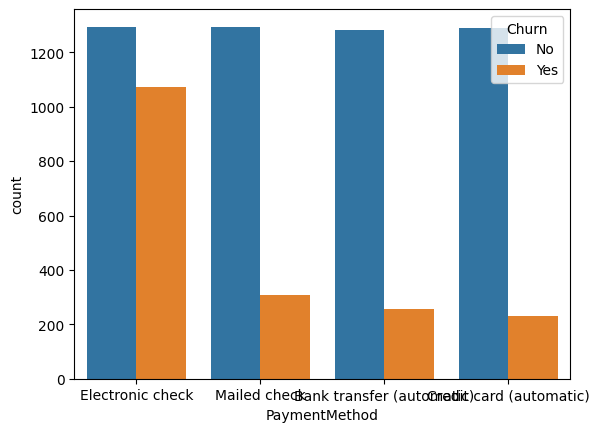

In [59]:
sns.countplot(x='PaymentMethod',hue='Churn',data=df)

In [60]:
df['PhoneService']=df['PhoneService'].map({'No':0,'Yes':1}).astype('int8')
df['MultipleLines']=df['MultipleLines'].map({'No':1,'Yes':2,'No phone service':0}).astype('int8')
df['Partner']=df['Partner'].map({'No':0,'Yes':1,'0':0,'1':1}).astype('int8')
df['Dependents']=df['Dependents'].map({'No':0,'Yes':1}).astype('int8')
df['gender']=df['gender'].map({'Male':0,'Female':1}).astype('int8')
df['InternetService']=df['InternetService'].map({'DSL':1,'Fiber optic':2,'No':0}).astype('int8')
df['OnlineSecurity']=df['OnlineSecurity'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['OnlineBackup']=df['OnlineBackup'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['DeviceProtection']=df['DeviceProtection'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['TechSupport']=df['TechSupport'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['StreamingTV']=df['StreamingTV'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['StreamingMovies']=df['StreamingMovies'].map({'No':1,'Yes':2,'No internet service':0}).astype('int8')
df['Contract']=df['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2}).astype('int8')
df['PaperlessBilling']=df['PaperlessBilling'].map({'No':0,'Yes':1}).astype('int8')
df['PaymentMethod']=df['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3}).astype('int8')
df['Churn']=df['Churn'].map({'No':0,'Yes':1}).astype('int8')

<Axes: >

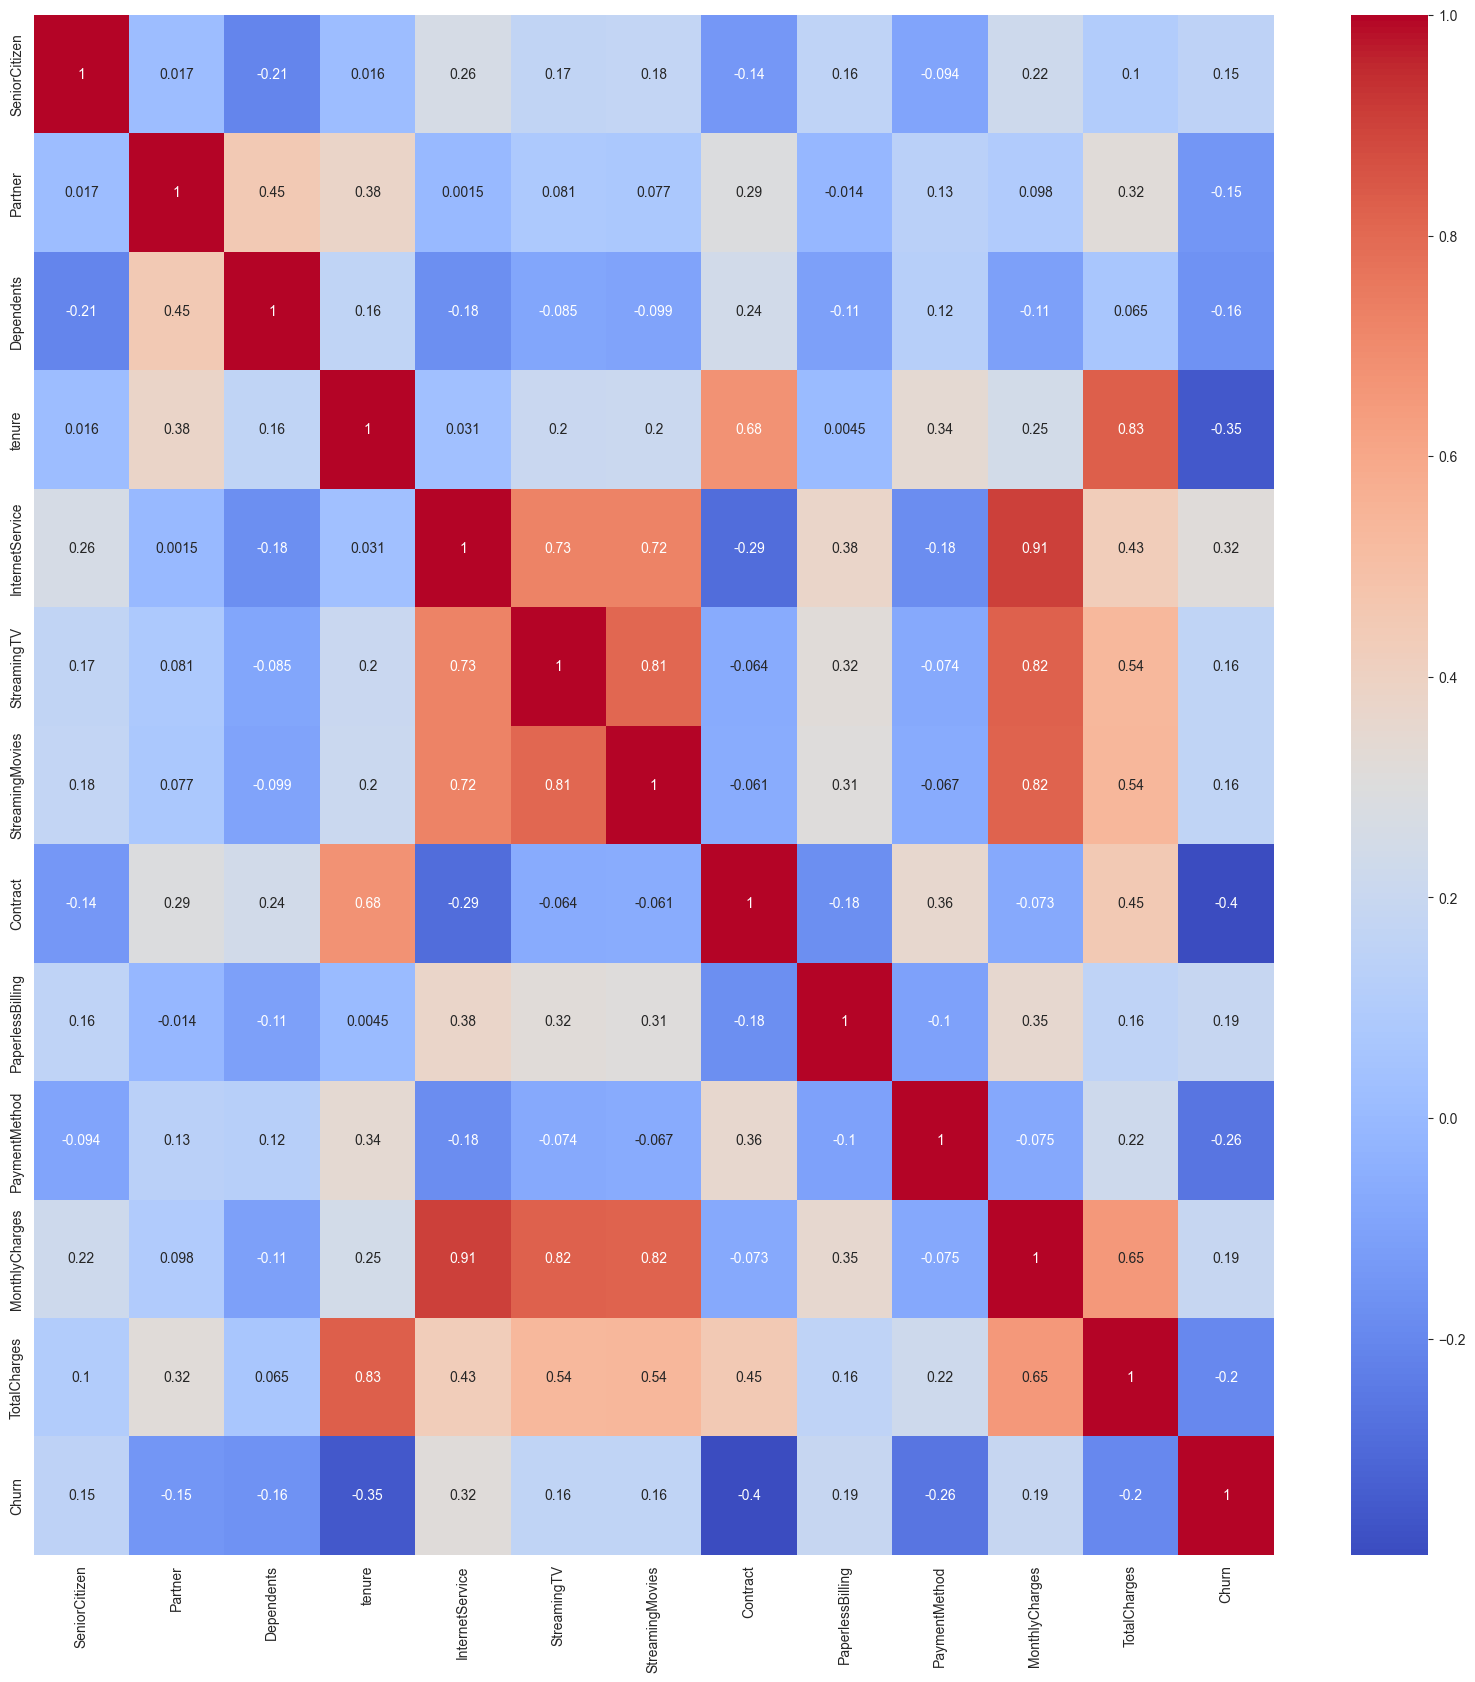

In [133]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [64]:
categorical_features=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [66]:
print(categorical_features)
len(categorical_features)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


16

In [68]:
numerical_features=['tenure','MonthlyCharges','TotalCharges']

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
features = df.loc[:,categorical_features]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k='all')
fit = best_features.fit(features,target)
#threshold = np.mean(fit.scores_)
threshold = 60
# Filter features based on the threshold
selected_features = features.columns[fit.scores_ > threshold]

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])
selected_featureScores = featureScores.loc[selected_features]
print(selected_featureScores)
rejected_featureScores = featureScores.loc[~featureScores.index.isin(selected_features)]

                  Chi Squared Score
SeniorCitizen            133.913928
Partner                   81.797456
Dependents               131.129586
InternetService          348.253340
StreamingTV               93.036474
StreamingMovies           91.073570
Contract                1110.390518
PaperlessBilling         104.757371
PaymentMethod            488.869275


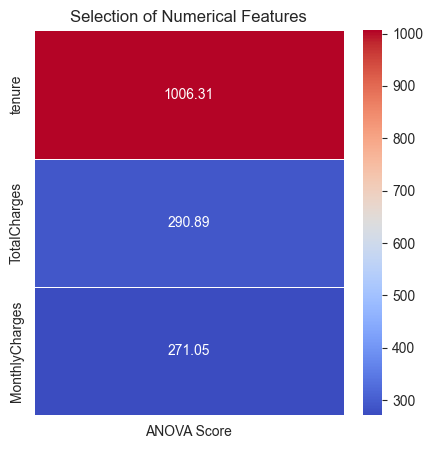

In [132]:
from sklearn.feature_selection import f_classif
features = df.loc[:,numerical_features]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),cmap='coolwarm',annot = True,linewidths = 0.4,linecolor = 'white',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [92]:
df.drop(columns=rejected_featureScores.index,inplace=True)

In [93]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,1,1,0,1,0,29.85,29.85,0
1,0,0,0,34,1,1,1,1,0,1,56.95,1889.50,0
2,0,0,0,2,1,1,1,0,1,1,53.85,108.15,1
3,0,0,0,45,1,1,1,1,0,2,42.30,1840.75,0
4,0,0,0,2,2,1,1,0,1,0,70.70,151.65,1


In [143]:
df.shape

(7027, 13)

In [144]:
#Reason for going data balancing
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy = 1)
x=df.drop(columns=['Churn'])
y=df['Churn']
x, y = over.fit_resample(x,y)
Counter(y)

Counter({0: 5159, 1: 5159})

In [145]:
from sklearn.model_selection import *
from sklearn.metrics import *


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [146]:
# def model(classifier,x_train,y_train,x_test,y_test):
    
#     classifier.fit(x_train,y_train)
#     prediction = classifier.predict(x_test)
#     cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
#     print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
#     print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
#     RocCurveDisplay.from_estimator(classifier, x_test,y_test)
#     plt.title('ROC_AUC_Plot')
#     plt.show()

# def model_evaluation(classifier,x_test,y_test):
    
#     # Confusion Matrix
#     cm = confusion_matrix(y_test,classifier.predict(x_test))
#     names = ['True Neg','False Pos','False Neg','True Pos']
#     counts = [value for value in cm.flatten()]
#     percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
#     labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
#     labels = np.asarray(labels).reshape(2,2)
#     sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
#     # Classification Report
#     print(classification_report(y_test,classifier.predict(x_test)))

In [147]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score: ", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score: ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier, x_test, y_test):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    # Set custom color map and style
    cmap = sns.color_palette("plasma")  # Set the desired color map
    sns.set_style("whitegrid")  # Set the desired style
    
    sns.heatmap(cm, annot=labels, cmap=cmap, fmt='', cbar=False)

    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test),zero_division=0))


In [148]:
# #Logistic Regression
# from sklearn.linear_model import LogisticRegression
# classifier_lr = LogisticRegression(solver='saga', max_iter=10000)
# classifier_lr = LogisticRegression(penalty='l2')
# model(classifier_lr, x_train, y_train, x_test, y_test)
# model_evaluation(classifier_lr, x_test, y_test)

Cross Validation Score:  84.33%
ROC_AUC Score:  76.85%


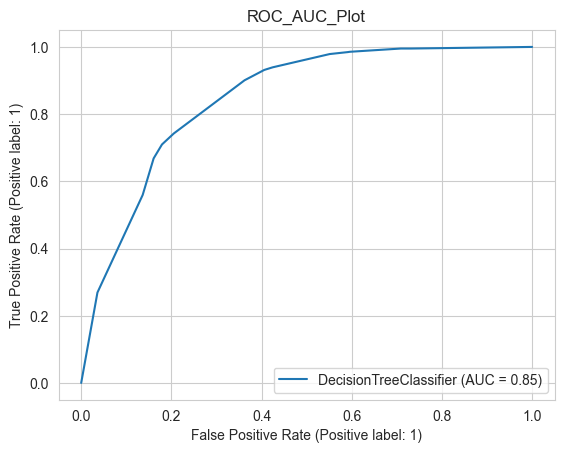

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1027
           1       0.78      0.74      0.76      1037

    accuracy                           0.77      2064
   macro avg       0.77      0.77      0.77      2064
weighted avg       0.77      0.77      0.77      2064



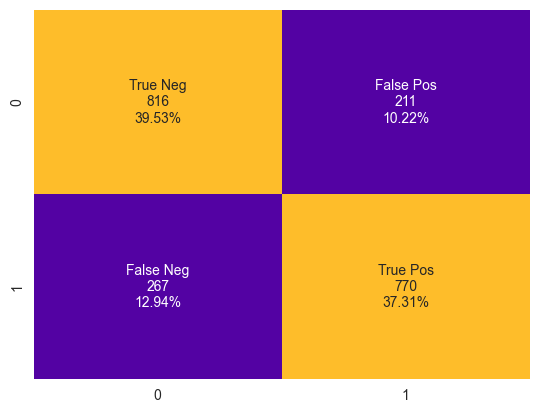

In [149]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model(classifier_dt,x_train,y_train,x_test,y_test)
model_evaluation(classifier_dt,x_test,y_test)

Cross Validation Score:  86.33%
ROC_AUC Score:  79.28%


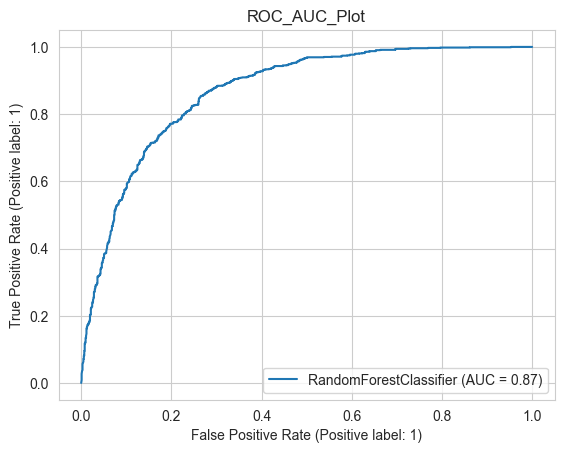

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1027
           1       0.76      0.87      0.81      1037

    accuracy                           0.79      2064
   macro avg       0.80      0.79      0.79      2064
weighted avg       0.80      0.79      0.79      2064



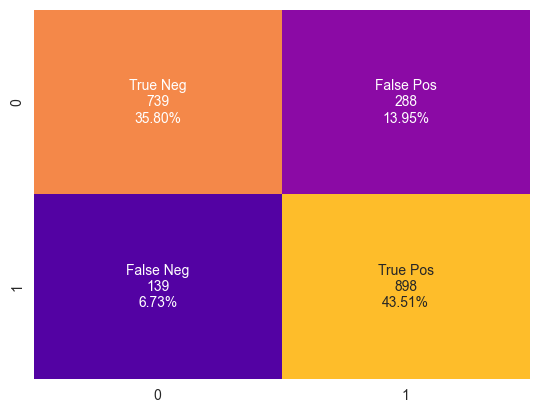

In [150]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf,x_train,y_train,x_test,y_test)
model_evaluation(classifier_rf,x_test,y_test)

Cross Validation Score:  73.64%
ROC_AUC Score:  66.70%


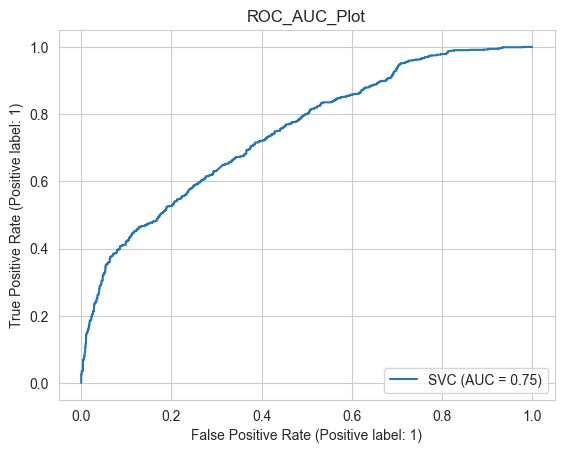

              precision    recall  f1-score   support

           0       0.65      0.73      0.68      1027
           1       0.69      0.61      0.65      1037

    accuracy                           0.67      2064
   macro avg       0.67      0.67      0.67      2064
weighted avg       0.67      0.67      0.67      2064



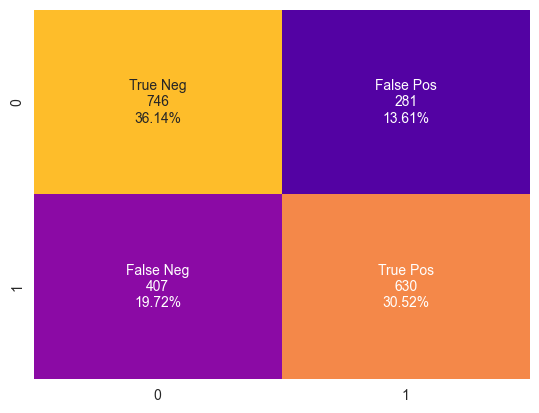

In [151]:
#SVM
from sklearn.svm import SVC
classifier_svm = SVC(kernel='rbf', probability=True)
model(classifier_svm, x_train, y_train, x_test, y_test)
model_evaluation(classifier_svm, x_test, y_test)

Cross Validation Score:  83.46%
ROC_AUC Score:  77.64%


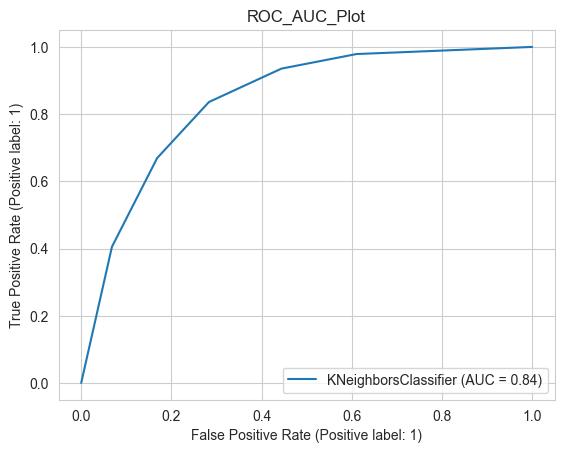

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1027
           1       0.75      0.84      0.79      1037

    accuracy                           0.78      2064
   macro avg       0.78      0.78      0.78      2064
weighted avg       0.78      0.78      0.78      2064



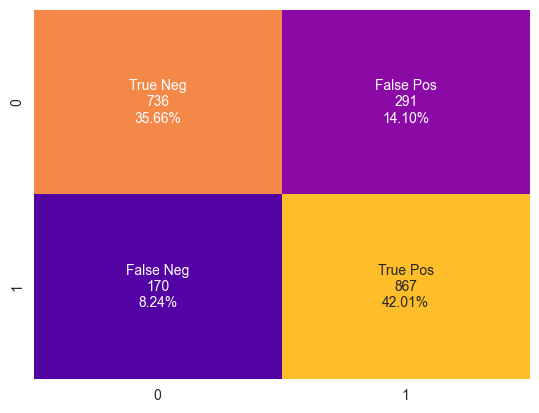

In [152]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5)
model(classifier_knn, x_train, y_train, x_test, y_test)
model_evaluation(classifier_knn, x_test, y_test)

Cross Validation Score:  87.87%
ROC_AUC Score:  80.01%


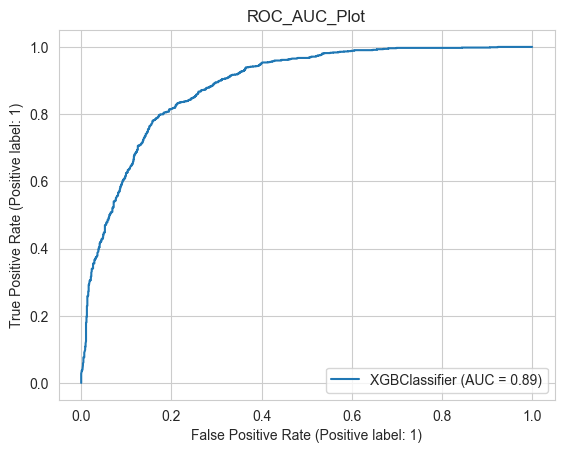

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1027
           1       0.77      0.85      0.81      1037

    accuracy                           0.80      2064
   macro avg       0.80      0.80      0.80      2064
weighted avg       0.80      0.80      0.80      2064



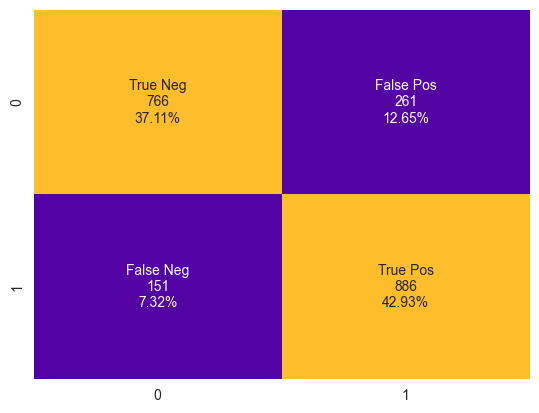

In [153]:
#xgboost
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,x_train,y_train,x_test,y_test)
model_evaluation(classifier_xgb,x_test,y_test)

[LightGBM] [Info] Number of positive: 4122, number of negative: 4132
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 8254, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499394 -> initscore=-0.002423
[LightGBM] [Info] Start training from score -0.002423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

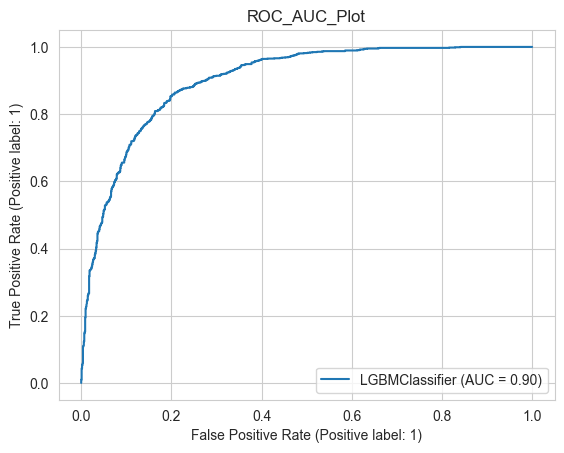

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1027
           1       0.81      0.85      0.83      1037

    accuracy                           0.83      2064
   macro avg       0.83      0.83      0.83      2064
weighted avg       0.83      0.83      0.83      2064



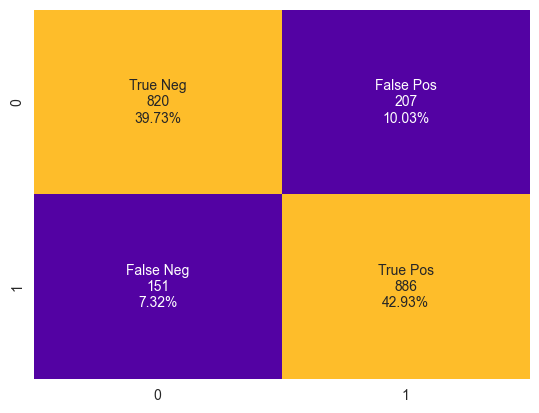

In [159]:
#LightGBM
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier(learning_rate=0.1,force_row_wise=True, max_depth=3, n_estimators=1000, num_leaves=31, random_state=42)

model(classifier_lgbm,x_train,y_train,x_test,y_test)
model_evaluation(classifier_lgbm, x_test, y_test)

0:	learn: 0.6587247	total: 145ms	remaining: 14.3s
1:	learn: 0.6295238	total: 148ms	remaining: 7.26s
2:	learn: 0.6049273	total: 152ms	remaining: 4.9s
3:	learn: 0.5840703	total: 154ms	remaining: 3.7s
4:	learn: 0.5657196	total: 156ms	remaining: 2.97s
5:	learn: 0.5509801	total: 158ms	remaining: 2.48s
6:	learn: 0.5376582	total: 160ms	remaining: 2.13s
7:	learn: 0.5270128	total: 163ms	remaining: 1.87s
8:	learn: 0.5168646	total: 165ms	remaining: 1.67s
9:	learn: 0.5087008	total: 167ms	remaining: 1.5s
10:	learn: 0.5014910	total: 169ms	remaining: 1.37s
11:	learn: 0.4945218	total: 172ms	remaining: 1.26s
12:	learn: 0.4881896	total: 174ms	remaining: 1.16s
13:	learn: 0.4824780	total: 176ms	remaining: 1.08s
14:	learn: 0.4776237	total: 179ms	remaining: 1.01s
15:	learn: 0.4733234	total: 181ms	remaining: 950ms
16:	learn: 0.4697768	total: 183ms	remaining: 894ms
17:	learn: 0.4664804	total: 185ms	remaining: 844ms
18:	learn: 0.4630910	total: 187ms	remaining: 799ms
19:	learn: 0.4606600	total: 189ms	remaining:

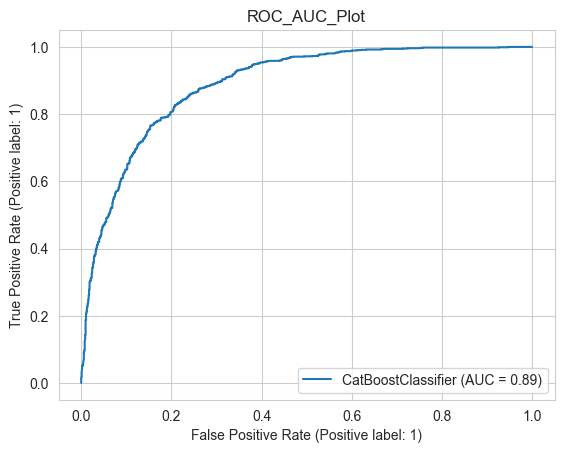

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1027
           1       0.79      0.85      0.82      1037

    accuracy                           0.81      2064
   macro avg       0.81      0.81      0.81      2064
weighted avg       0.81      0.81      0.81      2064



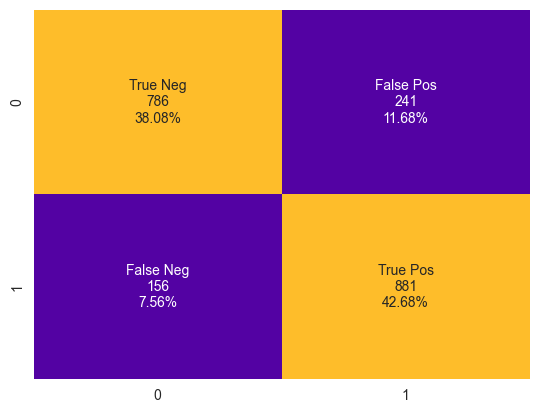

In [155]:
from catboost import CatBoostClassifier
classifier_catboost = CatBoostClassifier(learning_rate=0.1, iterations=100, depth=6)
model(classifier_catboost, x_train, y_train, x_test, y_test)
model_evaluation(classifier_catboost, x_test, y_test)